# **Enhancing Object Detection in YOLOS-Small through Advanced LoRA Methods**


# NOTE: This file is intended for DISPLAY PURPOSES ONLY and will NOT run independently.  
For full execution, please refer to the complete script:  


```
Enhancing_YOLOS_S_through_Advanced_LoRA_Methods.py
```


This file contains extracted sections to showcase outputs in GitHub.


## **6. Implementing LoRA Variants**


### **(c) LoHa- Low Rank Hadamard Product**

#### **LoHaConfig**


In [ ]:
# Define model for LoHa
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_for_LoHa = YolosForObjectDetection.from_pretrained(model_name).to(device)

# Configure LoHa
loha_config = LoHaConfig(
    r=8,
    alpha=12,
    rank_dropout=0.1,
    module_dropout=0.1,
    target_modules=target_modules
)

# Apply LoHa to the model
model_with_LoHa = get_peft_model(model_for_LoHa, loha_config)
model_with_LoHa.print_trainable_parameters()

trainable params: 294,912 || all params: 30,979,680 || trainable%: 0.9520


In [ ]:
# Inspect LoHa Layers
for name, param in model_with_LoHa.named_parameters():
    print(f"{name} - requires_grad: {param.requires_grad}")

for name, param in model_with_LoHa.named_parameters():
    if "hada" in name:
        print(name, param.shape)


base_model.model.vit.embeddings.cls_token - requires_grad: False
base_model.model.vit.embeddings.detection_tokens - requires_grad: False
base_model.model.vit.embeddings.position_embeddings - requires_grad: False
base_model.model.vit.embeddings.patch_embeddings.projection.weight - requires_grad: False
base_model.model.vit.embeddings.patch_embeddings.projection.bias - requires_grad: False
base_model.model.vit.encoder.mid_position_embeddings - requires_grad: False
base_model.model.vit.encoder.layer.0.attention.attention.query.base_layer.weight - requires_grad: False
base_model.model.vit.encoder.layer.0.attention.attention.query.base_layer.bias - requires_grad: False
base_model.model.vit.encoder.layer.0.attention.attention.query.hada_w1_a.default - requires_grad: True
base_model.model.vit.encoder.layer.0.attention.attention.query.hada_w1_b.default - requires_grad: True
base_model.model.vit.encoder.layer.0.attention.attention.query.hada_w2_a.default - requires_grad: True
base_model.model.vi

In [ ]:
# Mean value of LoHa layers before training
for name, param in model_with_LoHa.named_parameters():
    if "hada" in name:
        print(f"{name} mean before training: {param.data.mean().item():.6f}")


base_model.model.vit.encoder.layer.0.attention.attention.query.hada_w1_a.default mean before training: -0.001273
base_model.model.vit.encoder.layer.0.attention.attention.query.hada_w1_b.default mean before training: -0.000213
base_model.model.vit.encoder.layer.0.attention.attention.query.hada_w2_a.default mean before training: -0.002847
base_model.model.vit.encoder.layer.0.attention.attention.query.hada_w2_b.default mean before training: 0.000000
base_model.model.vit.encoder.layer.0.attention.attention.value.hada_w1_a.default mean before training: 0.000370
base_model.model.vit.encoder.layer.0.attention.attention.value.hada_w1_b.default mean before training: 0.000304
base_model.model.vit.encoder.layer.0.attention.attention.value.hada_w2_a.default mean before training: -0.008294
base_model.model.vit.encoder.layer.0.attention.attention.value.hada_w2_b.default mean before training: 0.000000
base_model.model.vit.encoder.layer.1.attention.attention.query.hada_w1_a.default mean before trainin

In [ ]:
loha_total_parameters = [p for p in model_with_LoHa.parameters()]
print(f"Number of LoHA parameter tensors: {len(loha_total_parameters)}")

loha_parameters = [p for p in model_with_LoHa.parameters() if p.requires_grad]
print(f"Number of LoHA trainable parameter tensors (requires_grad=True): {len(loha_parameters)}")


Number of LoHA parameter tensors: 308
Number of LoHA trainable parameter tensors (requires_grad=True): 96


#### **Train Model with LoHa**


  0%|          | 1/368 [00:04<27:16,  4.46s/it]

Epoch 1, Batch 0: Loss = 1.1005


  3%|▎         | 11/368 [00:48<28:19,  4.76s/it]

Epoch 1, Batch 10: Loss = 1.2646


  6%|▌         | 21/368 [01:31<22:43,  3.93s/it]

Epoch 1, Batch 20: Loss = 1.1268


  8%|▊         | 31/368 [02:16<25:20,  4.51s/it]

Epoch 1, Batch 30: Loss = 1.3350


 11%|█         | 41/368 [02:54<19:19,  3.54s/it]

Epoch 1, Batch 40: Loss = 0.9168


 14%|█▍        | 51/368 [03:29<18:39,  3.53s/it]

Epoch 1, Batch 50: Loss = 1.0532


 17%|█▋        | 61/368 [04:13<23:22,  4.57s/it]

Epoch 1, Batch 60: Loss = 1.2212


 19%|█▉        | 71/368 [04:56<21:15,  4.29s/it]

Epoch 1, Batch 70: Loss = 0.8263


 22%|██▏       | 81/368 [05:37<15:54,  3.32s/it]

Epoch 1, Batch 80: Loss = 1.0994


 25%|██▍       | 91/368 [06:14<16:43,  3.62s/it]

Epoch 1, Batch 90: Loss = 0.9350


 27%|██▋       | 101/368 [06:52<15:59,  3.59s/it]

Epoch 1, Batch 100: Loss = 1.4305


 30%|███       | 111/368 [07:29<17:27,  4.08s/it]

Epoch 1, Batch 110: Loss = 1.0318


 33%|███▎      | 121/368 [08:08<19:16,  4.68s/it]

Epoch 1, Batch 120: Loss = 1.0723


 36%|███▌      | 131/368 [08:49<18:51,  4.77s/it]

Epoch 1, Batch 130: Loss = 1.1628


 38%|███▊      | 141/368 [09:31<15:44,  4.16s/it]

Epoch 1, Batch 140: Loss = 0.8741


 41%|████      | 151/368 [10:13<14:38,  4.05s/it]

Epoch 1, Batch 150: Loss = 0.9302


 44%|████▍     | 161/368 [10:49<11:32,  3.35s/it]

Epoch 1, Batch 160: Loss = 1.0555


 46%|████▋     | 171/368 [11:24<13:22,  4.07s/it]

Epoch 1, Batch 170: Loss = 1.1330


 49%|████▉     | 181/368 [12:16<16:24,  5.26s/it]

Epoch 1, Batch 180: Loss = 1.1881


 52%|█████▏    | 191/368 [12:59<12:38,  4.29s/it]

Epoch 1, Batch 190: Loss = 0.6916


 55%|█████▍    | 201/368 [13:41<11:41,  4.20s/it]

Epoch 1, Batch 200: Loss = 0.9106


 57%|█████▋    | 211/368 [14:21<12:21,  4.72s/it]

Epoch 1, Batch 210: Loss = 0.9120


 60%|██████    | 221/368 [15:06<09:14,  3.77s/it]

Epoch 1, Batch 220: Loss = 1.0814


 63%|██████▎   | 231/368 [15:45<08:54,  3.90s/it]

Epoch 1, Batch 230: Loss = 1.0412


 65%|██████▌   | 241/368 [16:25<08:15,  3.90s/it]

Epoch 1, Batch 240: Loss = 0.8038


 68%|██████▊   | 251/368 [16:59<06:00,  3.08s/it]

Epoch 1, Batch 250: Loss = 1.1880


 71%|███████   | 261/368 [17:34<05:55,  3.32s/it]

Epoch 1, Batch 260: Loss = 1.4097


 74%|███████▎  | 271/368 [18:08<05:35,  3.45s/it]

Epoch 1, Batch 270: Loss = 1.2907


 76%|███████▋  | 281/368 [18:51<06:15,  4.31s/it]

Epoch 1, Batch 280: Loss = 0.9381


 79%|███████▉  | 291/368 [19:37<06:04,  4.73s/it]

Epoch 1, Batch 290: Loss = 1.0848


 82%|████████▏ | 301/368 [20:22<05:12,  4.67s/it]

Epoch 1, Batch 300: Loss = 1.0873


 85%|████████▍ | 311/368 [21:05<04:19,  4.55s/it]

Epoch 1, Batch 310: Loss = 1.1581


 87%|████████▋ | 321/368 [21:59<04:20,  5.54s/it]

Epoch 1, Batch 320: Loss = 0.9012


 90%|████████▉ | 331/368 [22:42<03:06,  5.04s/it]

Epoch 1, Batch 330: Loss = 1.1378


 93%|█████████▎| 341/368 [23:22<01:43,  3.84s/it]

Epoch 1, Batch 340: Loss = 0.9548


 95%|█████████▌| 351/368 [24:05<01:17,  4.57s/it]

Epoch 1, Batch 350: Loss = 0.8615


 98%|█████████▊| 361/368 [24:38<00:21,  3.06s/it]

Epoch 1, Batch 360: Loss = 1.0599


100%|██████████| 368/368 [25:07<00:00,  4.10s/it]


Epoch 1 Complete. Average train Loss: 4.3047, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [02:59<00:00,  1.14s/it]


Epoch 1 - Validation Loss: 4.2717


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.937 at location [0.99, 266.92, 323.41, 634.96]
Detected teddy bear with confidence 0.857 at location [197.57, 220.44, 353.18, 530.66]
Detected teddy bear with confidence 0.618 at location [297.81, 66.59, 427.94, 536.53]
Detected teddy bear with confidence 0.967 at location [108.96, 1.43, 427.56, 533.99]
Detected teddy bear with confidence 0.984 at location [0.11, 54.66, 197.8, 285.69]
Detected teddy bear with confidence 0.522 at location [102.89, 417.8, 321.24, 638.76]


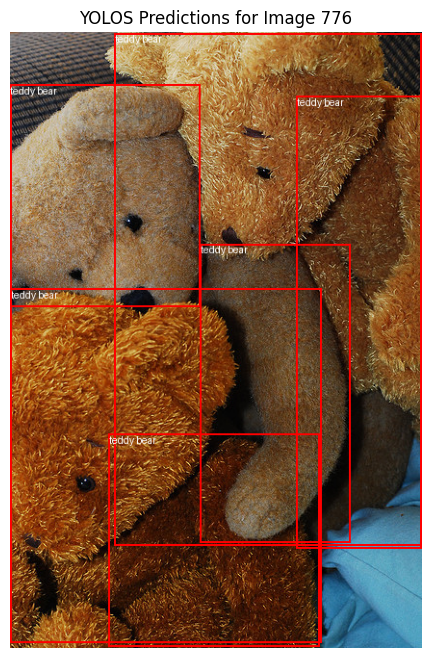

100%|██████████| 630/630 [02:28<00:00,  4.25it/s]


mAP@[0.5:0.95]: tensor(0.3835)
Detailed mAP results: {'map': tensor(0.3835), 'map_50': tensor(0.5587), 'map_75': tensor(0.4093), 'map_small': tensor(0.1199), 'map_medium': tensor(0.3413), 'map_large': tensor(0.5482), 'mar_1': tensor(0.3156), 'mar_10': tensor(0.4548), 'mar_100': tensor(0.4657), 'mar_small': tensor(0.1616), 'mar_medium': tensor(0.4280), 'mar_large': tensor(0.6242), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 1 - Validation mAP Score: 0.3835


map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.383485  0.558697  0.409275     0.1199    0.341289   0.548166  0.315623   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.454762  0.465706   0.161608    0.427982   0.624213           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3835 at epoch 1


  0%|          | 1/368 [00:02<16:47,  2.75s/it]

Epoch 2, Batch 0: Loss = 1.0165


  3%|▎         | 11/368 [00:45<23:55,  4.02s/it]

Epoch 2, Batch 10: Loss = 1.1056


  6%|▌         | 21/368 [01:31<25:11,  4.36s/it]

Epoch 2, Batch 20: Loss = 1.2192


  8%|▊         | 31/368 [02:13<21:32,  3.84s/it]

Epoch 2, Batch 30: Loss = 1.1406


 11%|█         | 41/368 [02:55<24:16,  4.45s/it]

Epoch 2, Batch 40: Loss = 0.9201


 14%|█▍        | 51/368 [03:32<18:18,  3.46s/it]

Epoch 2, Batch 50: Loss = 0.9269


 17%|█▋        | 61/368 [04:11<18:15,  3.57s/it]

Epoch 2, Batch 60: Loss = 0.9665


 19%|█▉        | 71/368 [04:45<17:04,  3.45s/it]

Epoch 2, Batch 70: Loss = 1.2261


 22%|██▏       | 81/368 [05:29<18:05,  3.78s/it]

Epoch 2, Batch 80: Loss = 0.9422


 25%|██▍       | 91/368 [06:12<18:52,  4.09s/it]

Epoch 2, Batch 90: Loss = 1.0202


 27%|██▋       | 101/368 [06:57<19:24,  4.36s/it]

Epoch 2, Batch 100: Loss = 0.8957


 30%|███       | 111/368 [07:32<12:48,  2.99s/it]

Epoch 2, Batch 110: Loss = 1.0305


 33%|███▎      | 121/368 [08:10<14:14,  3.46s/it]

Epoch 2, Batch 120: Loss = 0.9766


 36%|███▌      | 131/368 [08:48<14:03,  3.56s/it]

Epoch 2, Batch 130: Loss = 1.1589


 38%|███▊      | 141/368 [09:33<16:49,  4.45s/it]

Epoch 2, Batch 140: Loss = 0.8763


 41%|████      | 151/368 [10:11<14:43,  4.07s/it]

Epoch 2, Batch 150: Loss = 1.1855


 44%|████▍     | 161/368 [10:48<13:08,  3.81s/it]

Epoch 2, Batch 160: Loss = 0.8348


 46%|████▋     | 171/368 [11:30<14:15,  4.34s/it]

Epoch 2, Batch 170: Loss = 1.2897


 49%|████▉     | 181/368 [12:03<10:08,  3.25s/it]

Epoch 2, Batch 180: Loss = 1.2123


 52%|█████▏    | 191/368 [12:45<11:18,  3.83s/it]

Epoch 2, Batch 190: Loss = 0.9288


 55%|█████▍    | 201/368 [13:25<09:17,  3.34s/it]

Epoch 2, Batch 200: Loss = 1.0025


 57%|█████▋    | 211/368 [14:00<09:52,  3.78s/it]

Epoch 2, Batch 210: Loss = 1.0555


 60%|██████    | 221/368 [14:44<10:27,  4.27s/it]

Epoch 2, Batch 220: Loss = 0.9819


 63%|██████▎   | 231/368 [15:29<08:55,  3.91s/it]

Epoch 2, Batch 230: Loss = 1.1314


 65%|██████▌   | 241/368 [16:12<10:23,  4.91s/it]

Epoch 2, Batch 240: Loss = 1.0159


 68%|██████▊   | 251/368 [16:55<08:30,  4.36s/it]

Epoch 2, Batch 250: Loss = 1.0270


 71%|███████   | 261/368 [17:38<06:54,  3.88s/it]

Epoch 2, Batch 260: Loss = 1.0771


 74%|███████▎  | 271/368 [18:15<05:59,  3.71s/it]

Epoch 2, Batch 270: Loss = 0.9605


 76%|███████▋  | 281/368 [18:58<06:21,  4.39s/it]

Epoch 2, Batch 280: Loss = 1.0927


 79%|███████▉  | 291/368 [19:39<05:00,  3.90s/it]

Epoch 2, Batch 290: Loss = 0.9365


 82%|████████▏ | 301/368 [20:22<05:41,  5.09s/it]

Epoch 2, Batch 300: Loss = 0.8818


 85%|████████▍ | 311/368 [21:04<03:49,  4.03s/it]

Epoch 2, Batch 310: Loss = 1.0659


 87%|████████▋ | 321/368 [21:49<03:29,  4.47s/it]

Epoch 2, Batch 320: Loss = 0.9953


 90%|████████▉ | 331/368 [22:32<02:47,  4.52s/it]

Epoch 2, Batch 330: Loss = 0.8370


 93%|█████████▎| 341/368 [23:19<01:55,  4.27s/it]

Epoch 2, Batch 340: Loss = 1.1505


 95%|█████████▌| 351/368 [23:51<00:52,  3.11s/it]

Epoch 2, Batch 350: Loss = 0.8786


 98%|█████████▊| 361/368 [24:31<00:25,  3.71s/it]

Epoch 2, Batch 360: Loss = 0.9058


100%|██████████| 368/368 [24:58<00:00,  4.07s/it]


Epoch 2 Complete. Average train Loss: 4.2847, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [02:59<00:00,  1.13s/it]


Epoch 2 - Validation Loss: 4.2642


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.938 at location [0.99, 266.89, 323.41, 634.97]
Detected teddy bear with confidence 0.859 at location [197.58, 220.42, 353.16, 530.68]
Detected teddy bear with confidence 0.62 at location [297.82, 66.6, 427.94, 536.56]
Detected teddy bear with confidence 0.967 at location [108.96, 1.43, 427.56, 534.01]
Detected teddy bear with confidence 0.984 at location [0.11, 54.67, 197.8, 285.72]
Detected teddy bear with confidence 0.525 at location [102.89, 417.78, 321.24, 638.76]


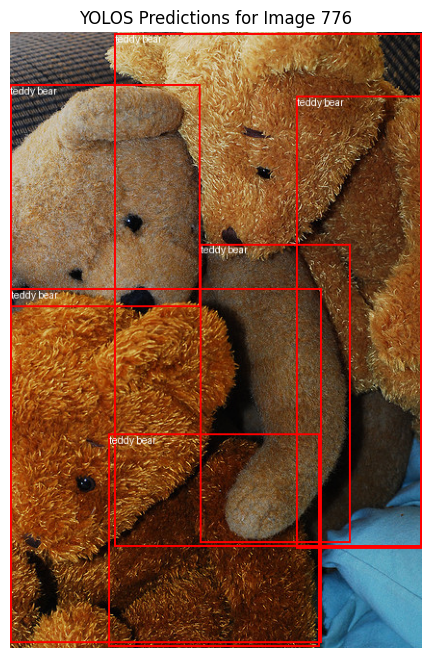

100%|██████████| 630/630 [02:28<00:00,  4.25it/s]


mAP@[0.5:0.95]: tensor(0.3837)
Detailed mAP results: {'map': tensor(0.3837), 'map_50': tensor(0.5588), 'map_75': tensor(0.4095), 'map_small': tensor(0.1199), 'map_medium': tensor(0.3415), 'map_large': tensor(0.5481), 'mar_1': tensor(0.3157), 'mar_10': tensor(0.4547), 'mar_100': tensor(0.4657), 'mar_small': tensor(0.1616), 'mar_medium': tensor(0.4280), 'mar_large': tensor(0.6242), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 2 - Validation mAP Score: 0.3837


map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.38365  0.558763  0.409527   0.119881    0.341463   0.548102  0.315681   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.454743  0.465718   0.161637    0.427982   0.624216           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3837 at epoch 2


  0%|          | 1/368 [00:03<20:01,  3.27s/it]

Epoch 3, Batch 0: Loss = 0.7541


  3%|▎         | 11/368 [00:41<24:34,  4.13s/it]

Epoch 3, Batch 10: Loss = 0.9594


  6%|▌         | 21/368 [01:23<25:51,  4.47s/it]

Epoch 3, Batch 20: Loss = 1.0739


  8%|▊         | 31/368 [02:08<24:38,  4.39s/it]

Epoch 3, Batch 30: Loss = 1.1117


 11%|█         | 41/368 [02:46<23:55,  4.39s/it]

Epoch 3, Batch 40: Loss = 0.8412


 14%|█▍        | 51/368 [03:26<21:07,  4.00s/it]

Epoch 3, Batch 50: Loss = 0.9779


 17%|█▋        | 61/368 [04:11<24:51,  4.86s/it]

Epoch 3, Batch 60: Loss = 1.1135


 19%|█▉        | 71/368 [04:51<20:40,  4.18s/it]

Epoch 3, Batch 70: Loss = 0.9736


 22%|██▏       | 81/368 [05:29<20:02,  4.19s/it]

Epoch 3, Batch 80: Loss = 1.1667


 25%|██▍       | 91/368 [06:06<16:19,  3.54s/it]

Epoch 3, Batch 90: Loss = 0.8943


 27%|██▋       | 101/368 [06:49<20:18,  4.57s/it]

Epoch 3, Batch 100: Loss = 1.1287


 30%|███       | 111/368 [07:28<18:39,  4.36s/it]

Epoch 3, Batch 110: Loss = 1.0807


 33%|███▎      | 121/368 [08:03<12:49,  3.12s/it]

Epoch 3, Batch 120: Loss = 1.0481


 36%|███▌      | 131/368 [08:42<16:06,  4.08s/it]

Epoch 3, Batch 130: Loss = 1.1221


 38%|███▊      | 141/368 [09:22<17:03,  4.51s/it]

Epoch 3, Batch 140: Loss = 1.0663


 41%|████      | 151/368 [10:08<17:53,  4.95s/it]

Epoch 3, Batch 150: Loss = 0.8970


 44%|████▍     | 161/368 [10:48<12:55,  3.75s/it]

Epoch 3, Batch 160: Loss = 1.0952


 46%|████▋     | 171/368 [11:28<12:04,  3.68s/it]

Epoch 3, Batch 170: Loss = 0.8877


 49%|████▉     | 181/368 [12:14<13:48,  4.43s/it]

Epoch 3, Batch 180: Loss = 1.1969


 52%|█████▏    | 191/368 [12:52<12:01,  4.08s/it]

Epoch 3, Batch 190: Loss = 1.1051


 55%|█████▍    | 201/368 [13:33<09:03,  3.26s/it]

Epoch 3, Batch 200: Loss = 0.9263


 57%|█████▋    | 211/368 [14:15<10:46,  4.12s/it]

Epoch 3, Batch 210: Loss = 1.1871


 60%|██████    | 221/368 [15:02<12:05,  4.93s/it]

Epoch 3, Batch 220: Loss = 1.2243


 63%|██████▎   | 231/368 [15:42<09:34,  4.19s/it]

Epoch 3, Batch 230: Loss = 0.9808


 65%|██████▌   | 241/368 [16:14<07:04,  3.35s/it]

Epoch 3, Batch 240: Loss = 0.9100


 68%|██████▊   | 251/368 [16:56<07:01,  3.61s/it]

Epoch 3, Batch 250: Loss = 0.9470


 71%|███████   | 261/368 [17:38<08:02,  4.50s/it]

Epoch 3, Batch 260: Loss = 0.7846


 74%|███████▎  | 271/368 [18:23<07:54,  4.89s/it]

Epoch 3, Batch 270: Loss = 0.8627


 76%|███████▋  | 281/368 [18:57<04:31,  3.12s/it]

Epoch 3, Batch 280: Loss = 0.9198


 79%|███████▉  | 291/368 [19:35<04:20,  3.39s/it]

Epoch 3, Batch 290: Loss = 1.0386


 82%|████████▏ | 301/368 [20:15<04:12,  3.76s/it]

Epoch 3, Batch 300: Loss = 0.8728


 85%|████████▍ | 311/368 [20:55<03:39,  3.84s/it]

Epoch 3, Batch 310: Loss = 1.1211


 87%|████████▋ | 321/368 [21:42<03:23,  4.34s/it]

Epoch 3, Batch 320: Loss = 1.0894


 90%|████████▉ | 331/368 [22:22<02:04,  3.36s/it]

Epoch 3, Batch 330: Loss = 1.2919


 93%|█████████▎| 341/368 [22:59<01:42,  3.81s/it]

Epoch 3, Batch 340: Loss = 1.1244


 95%|█████████▌| 351/368 [23:48<01:30,  5.31s/it]

Epoch 3, Batch 350: Loss = 1.1760


 98%|█████████▊| 361/368 [24:30<00:24,  3.57s/it]

Epoch 3, Batch 360: Loss = 1.0340


100%|██████████| 368/368 [24:56<00:00,  4.07s/it]


Epoch 3 Complete. Average train Loss: 4.2935, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [02:59<00:00,  1.14s/it]


Epoch 3 - Validation Loss: 4.2448


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.938 at location [0.99, 266.84, 323.4, 634.97]
Detected teddy bear with confidence 0.863 at location [197.59, 220.39, 353.13, 530.72]
Detected teddy bear with confidence 0.624 at location [297.82, 66.63, 427.95, 536.65]
Detected teddy bear with confidence 0.967 at location [108.95, 1.43, 427.56, 534.06]
Detected teddy bear with confidence 0.984 at location [0.1, 54.7, 197.78, 285.78]
Detected teddy bear with confidence 0.531 at location [102.88, 417.72, 321.24, 638.76]


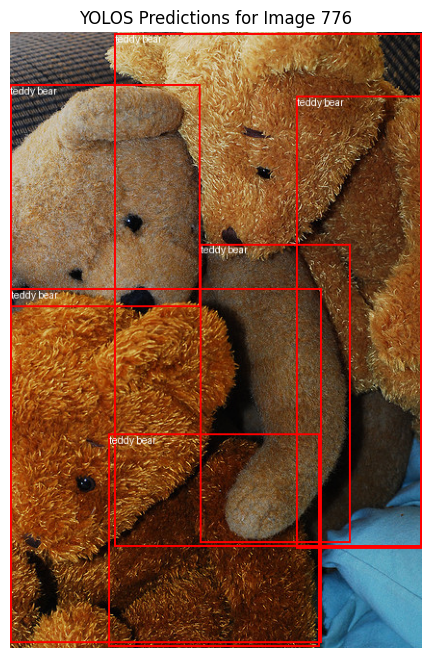

100%|██████████| 630/630 [02:29<00:00,  4.23it/s]


mAP@[0.5:0.95]: tensor(0.3850)
Detailed mAP results: {'map': tensor(0.3850), 'map_50': tensor(0.5605), 'map_75': tensor(0.4112), 'map_small': tensor(0.1222), 'map_medium': tensor(0.3411), 'map_large': tensor(0.5497), 'mar_1': tensor(0.3159), 'mar_10': tensor(0.4569), 'mar_100': tensor(0.4680), 'mar_small': tensor(0.1678), 'mar_medium': tensor(0.4294), 'mar_large': tensor(0.6260), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 3 - Validation mAP Score: 0.3850


map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.384982  0.560509  0.411226   0.122208     0.34107   0.549698  0.315919   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.456904  0.468008    0.16781    0.429415   0.626037           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3850 at epoch 3


  0%|          | 1/368 [00:05<32:21,  5.29s/it]

Epoch 4, Batch 0: Loss = 1.2875


  3%|▎         | 11/368 [00:53<28:24,  4.77s/it]

Epoch 4, Batch 10: Loss = 1.1153


  6%|▌         | 21/368 [01:33<24:05,  4.17s/it]

Epoch 4, Batch 20: Loss = 1.0526


  8%|▊         | 31/368 [02:11<20:33,  3.66s/it]

Epoch 4, Batch 30: Loss = 1.0591


 11%|█         | 41/368 [02:52<22:08,  4.06s/it]

Epoch 4, Batch 40: Loss = 1.3256


 14%|█▍        | 51/368 [03:34<21:39,  4.10s/it]

Epoch 4, Batch 50: Loss = 1.1992


 17%|█▋        | 61/368 [04:18<25:50,  5.05s/it]

Epoch 4, Batch 60: Loss = 0.8797


 19%|█▉        | 71/368 [04:52<16:09,  3.26s/it]

Epoch 4, Batch 70: Loss = 0.9341


 22%|██▏       | 81/368 [05:29<17:20,  3.63s/it]

Epoch 4, Batch 80: Loss = 0.9427


 25%|██▍       | 91/368 [06:13<20:30,  4.44s/it]

Epoch 4, Batch 90: Loss = 0.9661


 27%|██▋       | 101/368 [06:58<22:21,  5.02s/it]

Epoch 4, Batch 100: Loss = 1.1640


 30%|███       | 111/368 [07:36<16:39,  3.89s/it]

Epoch 4, Batch 110: Loss = 1.0039


 33%|███▎      | 121/368 [08:21<15:29,  3.76s/it]

Epoch 4, Batch 120: Loss = 1.1240


 36%|███▌      | 131/368 [09:07<18:29,  4.68s/it]

Epoch 4, Batch 130: Loss = 0.9743


 38%|███▊      | 141/368 [09:50<15:15,  4.03s/it]

Epoch 4, Batch 140: Loss = 1.1438


 41%|████      | 151/368 [10:43<17:39,  4.88s/it]

Epoch 4, Batch 150: Loss = 1.0015


 44%|████▍     | 161/368 [11:29<15:04,  4.37s/it]

Epoch 4, Batch 160: Loss = 1.0558


 46%|████▋     | 171/368 [12:12<14:39,  4.47s/it]

Epoch 4, Batch 170: Loss = 1.0121


 49%|████▉     | 181/368 [12:51<14:07,  4.53s/it]

Epoch 4, Batch 180: Loss = 1.0985


 52%|█████▏    | 191/368 [13:31<10:26,  3.54s/it]

Epoch 4, Batch 190: Loss = 0.9886


 55%|█████▍    | 201/368 [14:13<11:53,  4.27s/it]

Epoch 4, Batch 200: Loss = 1.0486


 57%|█████▋    | 211/368 [14:55<11:31,  4.41s/it]

Epoch 4, Batch 210: Loss = 0.9293


 60%|██████    | 221/368 [15:45<10:50,  4.43s/it]

Epoch 4, Batch 220: Loss = 1.1838


 63%|██████▎   | 231/368 [16:20<08:02,  3.52s/it]

Epoch 4, Batch 230: Loss = 0.8870


 65%|██████▌   | 241/368 [17:01<08:33,  4.05s/it]

Epoch 4, Batch 240: Loss = 1.0965


 68%|██████▊   | 251/368 [17:35<06:06,  3.13s/it]

Epoch 4, Batch 250: Loss = 1.2778


 71%|███████   | 261/368 [18:21<07:32,  4.23s/it]

Epoch 4, Batch 260: Loss = 0.9736


 74%|███████▎  | 271/368 [19:03<07:14,  4.48s/it]

Epoch 4, Batch 270: Loss = 1.0981


 76%|███████▋  | 281/368 [19:48<05:52,  4.05s/it]

Epoch 4, Batch 280: Loss = 1.0927


 79%|███████▉  | 291/368 [20:25<04:19,  3.37s/it]

Epoch 4, Batch 290: Loss = 1.1542


 82%|████████▏ | 301/368 [21:02<03:31,  3.16s/it]

Epoch 4, Batch 300: Loss = 0.9293


 85%|████████▍ | 311/368 [21:44<03:54,  4.12s/it]

Epoch 4, Batch 310: Loss = 1.1706


 87%|████████▋ | 321/368 [22:24<03:27,  4.42s/it]

Epoch 4, Batch 320: Loss = 0.9873


 90%|████████▉ | 331/368 [23:11<03:15,  5.29s/it]

Epoch 4, Batch 330: Loss = 0.9087


 93%|█████████▎| 341/368 [23:48<01:42,  3.81s/it]

Epoch 4, Batch 340: Loss = 0.9430


 95%|█████████▌| 351/368 [24:30<01:07,  3.99s/it]

Epoch 4, Batch 350: Loss = 1.2744


 98%|█████████▊| 361/368 [25:13<00:32,  4.63s/it]

Epoch 4, Batch 360: Loss = 1.2542


100%|██████████| 368/368 [25:32<00:00,  4.17s/it]


Epoch 4 Complete. Average train Loss: 4.2510, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [02:59<00:00,  1.14s/it]


Epoch 4 - Validation Loss: 4.2192


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.939 at location [0.99, 266.77, 323.38, 634.98]
Detected teddy bear with confidence 0.869 at location [197.62, 220.35, 353.09, 530.77]
Detected teddy bear with confidence 0.629 at location [297.84, 66.67, 427.95, 536.75]
Detected teddy bear with confidence 0.967 at location [108.96, 1.43, 427.56, 534.11]
Detected teddy bear with confidence 0.984 at location [0.1, 54.73, 197.76, 285.87]
Detected teddy bear with confidence 0.538 at location [102.87, 417.64, 321.24, 638.76]


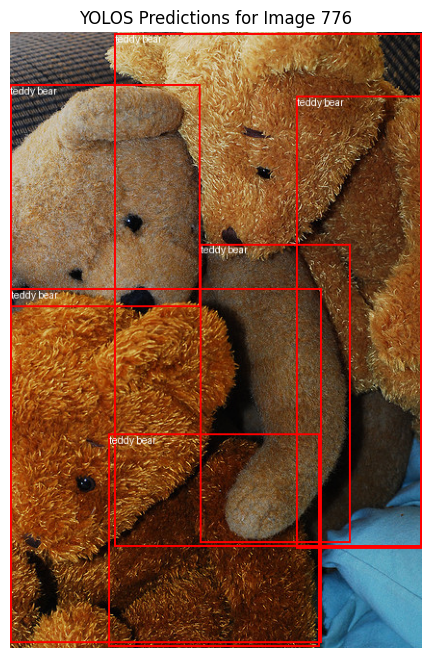

100%|██████████| 630/630 [02:28<00:00,  4.23it/s]


mAP@[0.5:0.95]: tensor(0.3857)
Detailed mAP results: {'map': tensor(0.3857), 'map_50': tensor(0.5616), 'map_75': tensor(0.4113), 'map_small': tensor(0.1232), 'map_medium': tensor(0.3404), 'map_large': tensor(0.5503), 'mar_1': tensor(0.3166), 'mar_10': tensor(0.4580), 'mar_100': tensor(0.4694), 'mar_small': tensor(0.1697), 'mar_medium': tensor(0.4298), 'mar_large': tensor(0.6274), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 4 - Validation mAP Score: 0.3857


map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.385665  0.561643  0.411289   0.123191    0.340434   0.550254  0.316647   

     mar_10  mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.458012  0.46936   0.169749    0.429806   0.627397           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3857 at epoch 4


  0%|          | 1/368 [00:03<20:15,  3.31s/it]

Epoch 5, Batch 0: Loss = 1.1177


  3%|▎         | 11/368 [00:49<28:32,  4.80s/it]

Epoch 5, Batch 10: Loss = 0.8402


  6%|▌         | 21/368 [01:34<24:39,  4.26s/it]

Epoch 5, Batch 20: Loss = 1.0283


  8%|▊         | 31/368 [02:06<17:48,  3.17s/it]

Epoch 5, Batch 30: Loss = 1.2507


 11%|█         | 41/368 [02:43<22:01,  4.04s/it]

Epoch 5, Batch 40: Loss = 0.7565


 14%|█▍        | 51/368 [03:26<20:46,  3.93s/it]

Epoch 5, Batch 50: Loss = 1.0764


 17%|█▋        | 61/368 [04:03<20:49,  4.07s/it]

Epoch 5, Batch 60: Loss = 0.9979


 19%|█▉        | 71/368 [04:42<16:36,  3.36s/it]

Epoch 5, Batch 70: Loss = 1.0390


 22%|██▏       | 81/368 [05:28<23:51,  4.99s/it]

Epoch 5, Batch 80: Loss = 1.1329


 25%|██▍       | 91/368 [06:06<19:30,  4.23s/it]

Epoch 5, Batch 90: Loss = 1.0367


 27%|██▋       | 101/368 [06:46<19:39,  4.42s/it]

Epoch 5, Batch 100: Loss = 1.0109


 30%|███       | 111/368 [07:31<16:51,  3.94s/it]

Epoch 5, Batch 110: Loss = 1.3975


 33%|███▎      | 121/368 [08:16<20:50,  5.06s/it]

Epoch 5, Batch 120: Loss = 0.7405


 36%|███▌      | 131/368 [09:02<18:57,  4.80s/it]

Epoch 5, Batch 130: Loss = 0.8601


 38%|███▊      | 141/368 [09:41<14:05,  3.72s/it]

Epoch 5, Batch 140: Loss = 1.4717


 41%|████      | 151/368 [10:25<15:17,  4.23s/it]

Epoch 5, Batch 150: Loss = 1.2993


 44%|████▍     | 161/368 [11:06<13:38,  3.96s/it]

Epoch 5, Batch 160: Loss = 1.2490


 46%|████▋     | 171/368 [11:46<11:28,  3.50s/it]

Epoch 5, Batch 170: Loss = 1.1634


 49%|████▉     | 181/368 [12:23<13:20,  4.28s/it]

Epoch 5, Batch 180: Loss = 0.9361


 52%|█████▏    | 191/368 [13:06<10:34,  3.59s/it]

Epoch 5, Batch 190: Loss = 1.0431


 55%|█████▍    | 201/368 [13:42<10:02,  3.61s/it]

Epoch 5, Batch 200: Loss = 1.2662


 57%|█████▋    | 211/368 [14:19<10:17,  3.93s/it]

Epoch 5, Batch 210: Loss = 0.8023


 60%|██████    | 221/368 [14:58<10:24,  4.24s/it]

Epoch 5, Batch 220: Loss = 1.2205


 63%|██████▎   | 231/368 [15:38<09:26,  4.14s/it]

Epoch 5, Batch 230: Loss = 0.9999


 65%|██████▌   | 241/368 [16:12<06:54,  3.26s/it]

Epoch 5, Batch 240: Loss = 1.1925


 68%|██████▊   | 251/368 [17:00<10:00,  5.14s/it]

Epoch 5, Batch 250: Loss = 1.3381


 71%|███████   | 261/368 [17:42<07:16,  4.08s/it]

Epoch 5, Batch 260: Loss = 1.3348


 74%|███████▎  | 271/368 [18:28<07:25,  4.59s/it]

Epoch 5, Batch 270: Loss = 1.3166


 76%|███████▋  | 281/368 [19:11<06:47,  4.68s/it]

Epoch 5, Batch 280: Loss = 0.9590


 79%|███████▉  | 291/368 [19:55<05:59,  4.68s/it]

Epoch 5, Batch 290: Loss = 1.1610


 82%|████████▏ | 301/368 [20:36<05:05,  4.56s/it]

Epoch 5, Batch 300: Loss = 0.8468


 85%|████████▍ | 311/368 [21:22<04:08,  4.36s/it]

Epoch 5, Batch 310: Loss = 1.5448


 87%|████████▋ | 321/368 [22:05<03:36,  4.61s/it]

Epoch 5, Batch 320: Loss = 0.9171


 90%|████████▉ | 331/368 [22:50<02:50,  4.62s/it]

Epoch 5, Batch 330: Loss = 1.1131


 93%|█████████▎| 341/368 [23:33<02:01,  4.52s/it]

Epoch 5, Batch 340: Loss = 0.9511


 95%|█████████▌| 351/368 [24:10<00:57,  3.37s/it]

Epoch 5, Batch 350: Loss = 1.1796


 98%|█████████▊| 361/368 [24:47<00:26,  3.72s/it]

Epoch 5, Batch 360: Loss = 0.9638


100%|██████████| 368/368 [25:09<00:00,  4.10s/it]


Epoch 5 Complete. Average train Loss: 4.2463, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [02:59<00:00,  1.14s/it]


Epoch 5 - Validation Loss: 4.2002


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.939 at location [0.98, 266.72, 323.37, 634.98]
Detected teddy bear with confidence 0.873 at location [197.64, 220.31, 353.06, 530.81]
Detected teddy bear with confidence 0.633 at location [297.85, 66.7, 427.95, 536.82]
Detected teddy bear with confidence 0.967 at location [108.96, 1.43, 427.56, 534.15]
Detected teddy bear with confidence 0.984 at location [0.09, 54.76, 197.74, 285.93]
Detected teddy bear with confidence 0.543 at location [102.86, 417.59, 321.24, 638.75]


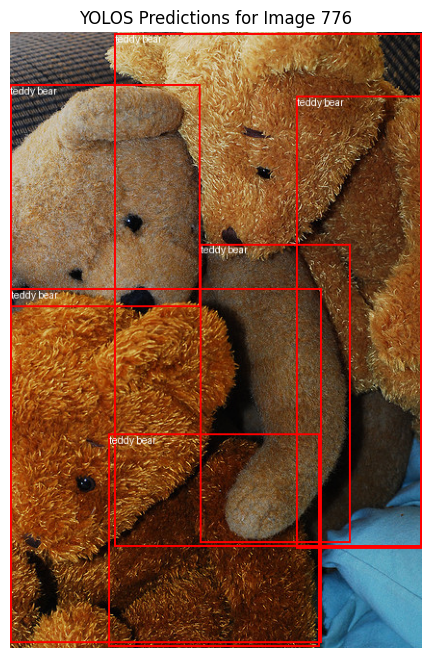

100%|██████████| 630/630 [02:28<00:00,  4.23it/s]


mAP@[0.5:0.95]: tensor(0.3860)
Detailed mAP results: {'map': tensor(0.3860), 'map_50': tensor(0.5610), 'map_75': tensor(0.4123), 'map_small': tensor(0.1240), 'map_medium': tensor(0.3405), 'map_large': tensor(0.5504), 'mar_1': tensor(0.3167), 'mar_10': tensor(0.4588), 'mar_100': tensor(0.4702), 'mar_small': tensor(0.1707), 'mar_medium': tensor(0.4310), 'mar_large': tensor(0.6280), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 5 - Validation mAP Score: 0.3860


map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.38599  0.560967  0.412288   0.124005    0.340543   0.550434  0.316743   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.458784  0.470176   0.170719    0.431023   0.627998           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3860 at epoch 5


  0%|          | 1/368 [00:04<26:44,  4.37s/it]

Epoch 6, Batch 0: Loss = 1.2253


  3%|▎         | 11/368 [00:41<25:32,  4.29s/it]

Epoch 6, Batch 10: Loss = 1.0908


  6%|▌         | 21/368 [01:20<20:45,  3.59s/it]

Epoch 6, Batch 20: Loss = 1.0273


  8%|▊         | 31/368 [01:56<18:10,  3.24s/it]

Epoch 6, Batch 30: Loss = 1.3802


 11%|█         | 41/368 [02:39<23:42,  4.35s/it]

Epoch 6, Batch 40: Loss = 1.0540


 14%|█▍        | 51/368 [03:24<26:04,  4.94s/it]

Epoch 6, Batch 50: Loss = 1.0121


 17%|█▋        | 61/368 [04:05<21:57,  4.29s/it]

Epoch 6, Batch 60: Loss = 1.0801


 19%|█▉        | 71/368 [04:48<18:42,  3.78s/it]

Epoch 6, Batch 70: Loss = 1.0664


 22%|██▏       | 81/368 [05:28<16:40,  3.49s/it]

Epoch 6, Batch 80: Loss = 1.3067


 25%|██▍       | 91/368 [06:03<15:07,  3.28s/it]

Epoch 6, Batch 90: Loss = 1.0050


 27%|██▋       | 101/368 [06:47<20:19,  4.57s/it]

Epoch 6, Batch 100: Loss = 1.0829


 30%|███       | 111/368 [07:26<16:16,  3.80s/it]

Epoch 6, Batch 110: Loss = 0.8939


 33%|███▎      | 121/368 [08:12<18:38,  4.53s/it]

Epoch 6, Batch 120: Loss = 1.0264


 36%|███▌      | 131/368 [08:49<16:21,  4.14s/it]

Epoch 6, Batch 130: Loss = 1.1179


 38%|███▊      | 141/368 [09:25<11:33,  3.05s/it]

Epoch 6, Batch 140: Loss = 1.2432


 41%|████      | 151/368 [10:01<12:39,  3.50s/it]

Epoch 6, Batch 150: Loss = 1.0028


 44%|████▍     | 161/368 [10:30<10:05,  2.92s/it]

Epoch 6, Batch 160: Loss = 1.3304


 46%|████▋     | 171/368 [11:10<13:28,  4.10s/it]

Epoch 6, Batch 170: Loss = 1.2139


 49%|████▉     | 181/368 [11:52<12:17,  3.95s/it]

Epoch 6, Batch 180: Loss = 0.8094


 52%|█████▏    | 191/368 [12:37<12:19,  4.18s/it]

Epoch 6, Batch 190: Loss = 0.8907


 55%|█████▍    | 201/368 [13:26<12:36,  4.53s/it]

Epoch 6, Batch 200: Loss = 1.3270


 57%|█████▋    | 211/368 [14:05<10:23,  3.97s/it]

Epoch 6, Batch 210: Loss = 0.8706


 60%|██████    | 221/368 [14:46<10:38,  4.34s/it]

Epoch 6, Batch 220: Loss = 0.9454


 63%|██████▎   | 231/368 [15:20<07:27,  3.26s/it]

Epoch 6, Batch 230: Loss = 1.4948


 65%|██████▌   | 241/368 [16:03<08:32,  4.04s/it]

Epoch 6, Batch 240: Loss = 0.9418


 68%|██████▊   | 251/368 [16:38<06:43,  3.44s/it]

Epoch 6, Batch 250: Loss = 1.1253


 71%|███████   | 261/368 [17:22<08:04,  4.52s/it]

Epoch 6, Batch 260: Loss = 1.0958


 74%|███████▎  | 271/368 [18:03<05:59,  3.71s/it]

Epoch 6, Batch 270: Loss = 1.2813


 76%|███████▋  | 281/368 [18:42<06:09,  4.25s/it]

Epoch 6, Batch 280: Loss = 1.0427


 79%|███████▉  | 291/368 [19:20<04:48,  3.74s/it]

Epoch 6, Batch 290: Loss = 0.9777


 82%|████████▏ | 301/368 [20:07<05:25,  4.86s/it]

Epoch 6, Batch 300: Loss = 0.8556


 85%|████████▍ | 311/368 [20:46<03:05,  3.26s/it]

Epoch 6, Batch 310: Loss = 0.9498


 87%|████████▋ | 321/368 [21:25<02:23,  3.06s/it]

Epoch 6, Batch 320: Loss = 0.9754


 90%|████████▉ | 331/368 [22:11<03:07,  5.07s/it]

Epoch 6, Batch 330: Loss = 0.9707


 93%|█████████▎| 341/368 [22:58<01:59,  4.42s/it]

Epoch 6, Batch 340: Loss = 1.0873


 95%|█████████▌| 351/368 [23:44<01:08,  4.01s/it]

Epoch 6, Batch 350: Loss = 1.1113


 98%|█████████▊| 361/368 [24:25<00:30,  4.30s/it]

Epoch 6, Batch 360: Loss = 0.9723


100%|██████████| 368/368 [24:49<00:00,  4.05s/it]


Epoch 6 Complete. Average train Loss: 4.2219, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [02:59<00:00,  1.14s/it]


Epoch 6 - Validation Loss: 4.1934


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.939 at location [0.98, 266.7, 323.37, 634.99]
Detected teddy bear with confidence 0.874 at location [197.65, 220.3, 353.05, 530.82]
Detected teddy bear with confidence 0.635 at location [297.85, 66.71, 427.95, 536.84]
Detected teddy bear with confidence 0.967 at location [108.97, 1.43, 427.56, 534.17]
Detected teddy bear with confidence 0.984 at location [0.09, 54.77, 197.74, 285.95]
Detected teddy bear with confidence 0.545 at location [102.86, 417.57, 321.24, 638.75]


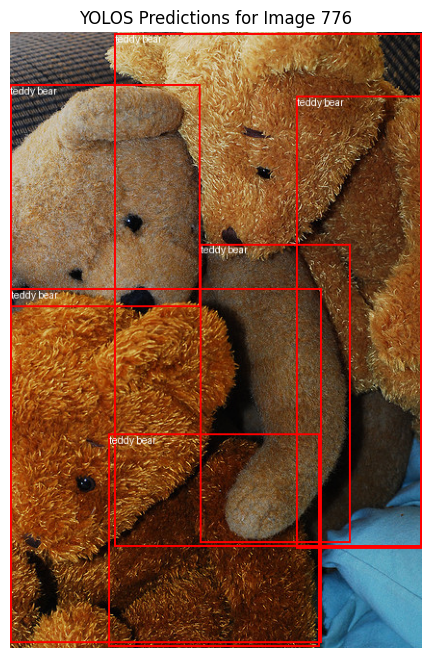

100%|██████████| 630/630 [02:28<00:00,  4.24it/s]


mAP@[0.5:0.95]: tensor(0.3864)
Detailed mAP results: {'map': tensor(0.3864), 'map_50': tensor(0.5613), 'map_75': tensor(0.4125), 'map_small': tensor(0.1289), 'map_medium': tensor(0.3406), 'map_large': tensor(0.5507), 'mar_1': tensor(0.3171), 'mar_10': tensor(0.4591), 'mar_100': tensor(0.4707), 'mar_small': tensor(0.1801), 'mar_medium': tensor(0.4311), 'mar_large': tensor(0.6286), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 6 - Validation mAP Score: 0.3864


map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.3864  0.561346  0.412459   0.128855    0.340564   0.550713  0.317095   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.459107  0.470715   0.180076     0.43113   0.628567           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3864 at epoch 6


  0%|          | 1/368 [00:04<27:26,  4.49s/it]

Epoch 7, Batch 0: Loss = 1.0260


  3%|▎         | 11/368 [00:48<28:04,  4.72s/it]

Epoch 7, Batch 10: Loss = 1.0048


  6%|▌         | 21/368 [01:31<24:35,  4.25s/it]

Epoch 7, Batch 20: Loss = 0.9677


  8%|▊         | 31/368 [02:12<19:59,  3.56s/it]

Epoch 7, Batch 30: Loss = 1.2564


 11%|█         | 41/368 [02:50<22:07,  4.06s/it]

Epoch 7, Batch 40: Loss = 0.9205


 14%|█▍        | 51/368 [03:27<17:53,  3.38s/it]

Epoch 7, Batch 50: Loss = 1.1285


 17%|█▋        | 61/368 [04:07<18:49,  3.68s/it]

Epoch 7, Batch 60: Loss = 1.0142


 19%|█▉        | 71/368 [04:42<16:31,  3.34s/it]

Epoch 7, Batch 70: Loss = 0.8897


 22%|██▏       | 81/368 [05:23<18:02,  3.77s/it]

Epoch 7, Batch 80: Loss = 1.1820


 25%|██▍       | 91/368 [05:57<14:36,  3.17s/it]

Epoch 7, Batch 90: Loss = 1.1037


 27%|██▋       | 101/368 [06:35<19:19,  4.34s/it]

Epoch 7, Batch 100: Loss = 1.0060


 30%|███       | 111/368 [07:23<21:20,  4.98s/it]

Epoch 7, Batch 110: Loss = 1.1846


 33%|███▎      | 121/368 [08:03<15:08,  3.68s/it]

Epoch 7, Batch 120: Loss = 1.1222


 36%|███▌      | 131/368 [08:42<14:20,  3.63s/it]

Epoch 7, Batch 130: Loss = 1.1493


 38%|███▊      | 141/368 [09:20<13:18,  3.52s/it]

Epoch 7, Batch 140: Loss = 0.9887


 41%|████      | 151/368 [10:00<16:07,  4.46s/it]

Epoch 7, Batch 150: Loss = 1.1324


 44%|████▍     | 161/368 [10:44<12:55,  3.75s/it]

Epoch 7, Batch 160: Loss = 0.9502


 46%|████▋     | 171/368 [11:21<11:18,  3.45s/it]

Epoch 7, Batch 170: Loss = 1.0034


 49%|████▉     | 181/368 [12:03<16:02,  5.15s/it]

Epoch 7, Batch 180: Loss = 1.0274


 52%|█████▏    | 191/368 [12:43<11:05,  3.76s/it]

Epoch 7, Batch 190: Loss = 1.0883


 55%|█████▍    | 201/368 [13:14<08:15,  2.97s/it]

Epoch 7, Batch 200: Loss = 0.9837


 57%|█████▋    | 211/368 [13:45<07:15,  2.77s/it]

Epoch 7, Batch 210: Loss = 1.0181


 60%|██████    | 221/368 [14:33<11:37,  4.75s/it]

Epoch 7, Batch 220: Loss = 1.1002


 63%|██████▎   | 231/368 [15:15<10:55,  4.79s/it]

Epoch 7, Batch 230: Loss = 0.9640


 65%|██████▌   | 241/368 [15:53<07:28,  3.53s/it]

Epoch 7, Batch 240: Loss = 1.0826


 68%|██████▊   | 251/368 [16:38<08:56,  4.58s/it]

Epoch 7, Batch 250: Loss = 1.1014


 71%|███████   | 261/368 [17:22<08:07,  4.55s/it]

Epoch 7, Batch 260: Loss = 0.9910


 74%|███████▎  | 271/368 [18:02<06:47,  4.20s/it]

Epoch 7, Batch 270: Loss = 1.0971


 76%|███████▋  | 281/368 [18:43<06:11,  4.27s/it]

Epoch 7, Batch 280: Loss = 0.8893


 79%|███████▉  | 291/368 [19:27<05:59,  4.67s/it]

Epoch 7, Batch 290: Loss = 0.8125


 82%|████████▏ | 301/368 [20:02<03:44,  3.35s/it]

Epoch 7, Batch 300: Loss = 1.1721


 85%|████████▍ | 311/368 [20:39<04:01,  4.24s/it]

Epoch 7, Batch 310: Loss = 1.0181


 87%|████████▋ | 321/368 [21:19<03:01,  3.86s/it]

Epoch 7, Batch 320: Loss = 1.0936


 90%|████████▉ | 331/368 [22:05<02:40,  4.35s/it]

Epoch 7, Batch 330: Loss = 1.0739


 93%|█████████▎| 341/368 [22:47<01:45,  3.91s/it]

Epoch 7, Batch 340: Loss = 1.0746


 95%|█████████▌| 351/368 [23:27<01:07,  3.97s/it]

Epoch 7, Batch 350: Loss = 1.5074


 98%|█████████▊| 361/368 [24:00<00:21,  3.03s/it]

Epoch 7, Batch 360: Loss = 1.0851


100%|██████████| 368/368 [24:28<00:00,  3.99s/it]


Epoch 7 Complete. Average train Loss: 4.2071, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [02:59<00:00,  1.14s/it]


Epoch 7 - Validation Loss: 4.1473


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.94 at location [0.98, 266.56, 323.34, 635.0]
Detected teddy bear with confidence 0.51 at location [303.64, 65.62, 427.7, 413.77]
Detected teddy bear with confidence 0.883 at location [197.71, 220.21, 352.98, 530.91]
Detected teddy bear with confidence 0.644 at location [297.86, 66.77, 427.96, 537.0]
Detected teddy bear with confidence 0.967 at location [108.98, 1.43, 427.55, 534.26]
Detected teddy bear with confidence 0.984 at location [0.08, 54.83, 197.69, 286.11]
Detected teddy bear with confidence 0.559 at location [102.84, 417.46, 321.24, 638.74]


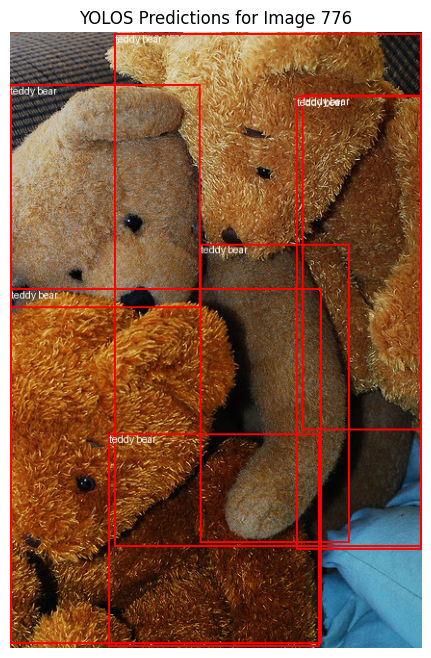

100%|██████████| 630/630 [02:29<00:00,  4.23it/s]


mAP@[0.5:0.95]: tensor(0.3866)
Detailed mAP results: {'map': tensor(0.3866), 'map_50': tensor(0.5615), 'map_75': tensor(0.4136), 'map_small': tensor(0.1294), 'map_medium': tensor(0.3401), 'map_large': tensor(0.5520), 'mar_1': tensor(0.3171), 'mar_10': tensor(0.4593), 'mar_100': tensor(0.4712), 'mar_small': tensor(0.1811), 'mar_medium': tensor(0.4307), 'mar_large': tensor(0.6313), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 7 - Validation mAP Score: 0.3866


map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.386587  0.561496  0.413551   0.129407    0.340123   0.551959  0.317092   

     mar_10  mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.459259  0.47124   0.181104    0.430713   0.631341           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3866 at epoch 7


  0%|          | 1/368 [00:02<16:47,  2.74s/it]

Epoch 8, Batch 0: Loss = 0.8329


  3%|▎         | 11/368 [00:38<22:24,  3.77s/it]

Epoch 8, Batch 10: Loss = 1.0399


  6%|▌         | 21/368 [01:15<20:06,  3.48s/it]

Epoch 8, Batch 20: Loss = 0.9820


  8%|▊         | 31/368 [01:47<16:49,  3.00s/it]

Epoch 8, Batch 30: Loss = 0.9817


 11%|█         | 41/368 [02:31<24:51,  4.56s/it]

Epoch 8, Batch 40: Loss = 0.9854


 14%|█▍        | 51/368 [03:12<24:56,  4.72s/it]

Epoch 8, Batch 50: Loss = 0.9418


 17%|█▋        | 61/368 [03:49<18:10,  3.55s/it]

Epoch 8, Batch 60: Loss = 1.0111


 19%|█▉        | 71/368 [04:26<21:35,  4.36s/it]

Epoch 8, Batch 70: Loss = 0.9994


 22%|██▏       | 81/368 [05:15<25:38,  5.36s/it]

Epoch 8, Batch 80: Loss = 0.7932


 25%|██▍       | 91/368 [06:03<21:19,  4.62s/it]

Epoch 8, Batch 90: Loss = 0.9966


 27%|██▋       | 101/368 [06:41<16:36,  3.73s/it]

Epoch 8, Batch 100: Loss = 0.9916


 30%|███       | 111/368 [07:26<16:08,  3.77s/it]

Epoch 8, Batch 110: Loss = 0.9143


 33%|███▎      | 121/368 [08:12<17:23,  4.23s/it]

Epoch 8, Batch 120: Loss = 1.3618


 36%|███▌      | 131/368 [08:52<17:06,  4.33s/it]

Epoch 8, Batch 130: Loss = 0.9815


 38%|███▊      | 141/368 [09:24<12:02,  3.18s/it]

Epoch 8, Batch 140: Loss = 1.0004


 41%|████      | 151/368 [10:04<13:29,  3.73s/it]

Epoch 8, Batch 150: Loss = 0.8910


 44%|████▍     | 161/368 [10:48<15:32,  4.51s/it]

Epoch 8, Batch 160: Loss = 0.9680


 46%|████▋     | 171/368 [11:35<16:53,  5.14s/it]

Epoch 8, Batch 170: Loss = 1.2252


 49%|████▉     | 181/368 [12:16<12:22,  3.97s/it]

Epoch 8, Batch 180: Loss = 0.8489


 52%|█████▏    | 191/368 [12:58<13:41,  4.64s/it]

Epoch 8, Batch 190: Loss = 0.9370


 55%|█████▍    | 201/368 [13:41<11:49,  4.25s/it]

Epoch 8, Batch 200: Loss = 0.8631


 57%|█████▋    | 211/368 [14:25<11:27,  4.38s/it]

Epoch 8, Batch 210: Loss = 0.9686


 60%|██████    | 221/368 [15:07<09:07,  3.73s/it]

Epoch 8, Batch 220: Loss = 1.0809


 63%|██████▎   | 231/368 [15:51<11:26,  5.01s/it]

Epoch 8, Batch 230: Loss = 0.9202


 65%|██████▌   | 241/368 [16:25<06:52,  3.25s/it]

Epoch 8, Batch 240: Loss = 0.8810


 68%|██████▊   | 251/368 [17:10<07:49,  4.02s/it]

Epoch 8, Batch 250: Loss = 1.1623


 71%|███████   | 261/368 [17:49<06:29,  3.64s/it]

Epoch 8, Batch 260: Loss = 1.0025


 74%|███████▎  | 271/368 [18:24<05:13,  3.23s/it]

Epoch 8, Batch 270: Loss = 1.3058


 76%|███████▋  | 281/368 [19:08<05:43,  3.95s/it]

Epoch 8, Batch 280: Loss = 0.9911


 79%|███████▉  | 291/368 [19:40<03:44,  2.92s/it]

Epoch 8, Batch 290: Loss = 0.8470


 82%|████████▏ | 301/368 [20:28<05:27,  4.89s/it]

Epoch 8, Batch 300: Loss = 1.1312


 85%|████████▍ | 311/368 [21:13<03:51,  4.06s/it]

Epoch 8, Batch 310: Loss = 1.0930


 87%|████████▋ | 321/368 [21:49<02:31,  3.23s/it]

Epoch 8, Batch 320: Loss = 0.8938


 90%|████████▉ | 331/368 [22:35<02:48,  4.54s/it]

Epoch 8, Batch 330: Loss = 1.0831


 93%|█████████▎| 341/368 [23:14<01:47,  4.00s/it]

Epoch 8, Batch 340: Loss = 1.0255


 95%|█████████▌| 351/368 [23:55<01:12,  4.27s/it]

Epoch 8, Batch 350: Loss = 1.1716


 98%|█████████▊| 361/368 [24:33<00:25,  3.68s/it]

Epoch 8, Batch 360: Loss = 1.1353


100%|██████████| 368/368 [24:58<00:00,  4.07s/it]


Epoch 8 Complete. Average train Loss: 4.1562, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [02:59<00:00,  1.14s/it]


Epoch 8 - Validation Loss: 4.0851


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.941 at location [0.97, 266.38, 323.3, 635.02]
Detected teddy bear with confidence 0.533 at location [303.65, 65.73, 427.7, 414.0]
Detected teddy bear with confidence 0.894 at location [197.8, 220.09, 352.89, 531.02]
Detected teddy bear with confidence 0.655 at location [297.88, 66.87, 427.97, 537.21]
Detected teddy bear with confidence 0.967 at location [108.99, 1.43, 427.55, 534.37]
Detected teddy bear with confidence 0.985 at location [0.07, 54.91, 197.63, 286.33]
Detected teddy bear with confidence 0.577 at location [102.82, 417.29, 321.25, 638.73]


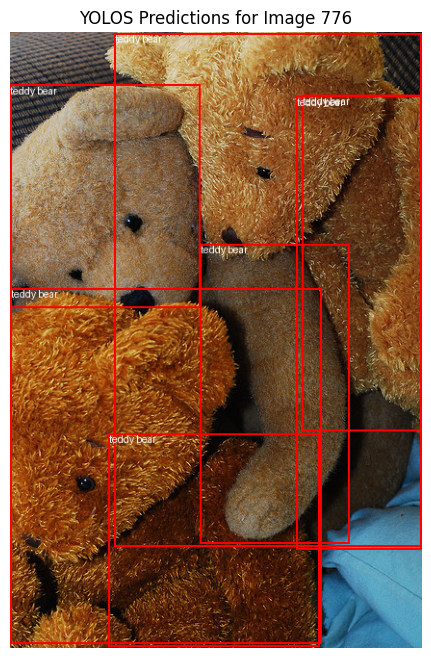

100%|██████████| 630/630 [02:29<00:00,  4.23it/s]


mAP@[0.5:0.95]: tensor(0.3881)
Detailed mAP results: {'map': tensor(0.3881), 'map_50': tensor(0.5644), 'map_75': tensor(0.4171), 'map_small': tensor(0.1308), 'map_medium': tensor(0.3436), 'map_large': tensor(0.5535), 'mar_1': tensor(0.3159), 'mar_10': tensor(0.4614), 'mar_100': tensor(0.4738), 'mar_small': tensor(0.1836), 'mar_medium': tensor(0.4396), 'mar_large': tensor(0.6337), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 8 - Validation mAP Score: 0.3881


map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.388068  0.564425  0.417069   0.130782    0.343617   0.553453  0.315859   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.461387  0.473844   0.183619     0.43964   0.633681           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3881 at epoch 8


  0%|          | 1/368 [00:04<30:22,  4.97s/it]

Epoch 9, Batch 0: Loss = 1.1058


  3%|▎         | 11/368 [00:43<20:59,  3.53s/it]

Epoch 9, Batch 10: Loss = 0.9192


  6%|▌         | 21/368 [01:26<26:24,  4.57s/it]

Epoch 9, Batch 20: Loss = 0.9720


  8%|▊         | 31/368 [02:10<24:13,  4.31s/it]

Epoch 9, Batch 30: Loss = 0.8008


 11%|█         | 41/368 [02:56<26:39,  4.89s/it]

Epoch 9, Batch 40: Loss = 0.9767


 14%|█▍        | 51/368 [03:38<23:35,  4.47s/it]

Epoch 9, Batch 50: Loss = 0.9468


 17%|█▋        | 61/368 [04:19<19:56,  3.90s/it]

Epoch 9, Batch 60: Loss = 1.2340


 19%|█▉        | 71/368 [04:59<20:14,  4.09s/it]

Epoch 9, Batch 70: Loss = 1.1837


 22%|██▏       | 81/368 [05:49<24:09,  5.05s/it]

Epoch 9, Batch 80: Loss = 0.9458


 25%|██▍       | 91/368 [06:33<21:57,  4.76s/it]

Epoch 9, Batch 90: Loss = 0.9521


 27%|██▋       | 101/368 [07:16<21:16,  4.78s/it]

Epoch 9, Batch 100: Loss = 0.9293


 30%|███       | 111/368 [07:56<18:06,  4.23s/it]

Epoch 9, Batch 110: Loss = 0.9709


 33%|███▎      | 121/368 [08:35<15:59,  3.88s/it]

Epoch 9, Batch 120: Loss = 0.9760


 36%|███▌      | 131/368 [09:14<13:37,  3.45s/it]

Epoch 9, Batch 130: Loss = 1.1910


 38%|███▊      | 141/368 [09:55<16:28,  4.36s/it]

Epoch 9, Batch 140: Loss = 1.0445


 41%|████      | 151/368 [10:34<15:18,  4.23s/it]

Epoch 9, Batch 150: Loss = 0.9207


 44%|████▍     | 161/368 [11:14<15:54,  4.61s/it]

Epoch 9, Batch 160: Loss = 0.8271


 46%|████▋     | 171/368 [11:50<12:44,  3.88s/it]

Epoch 9, Batch 170: Loss = 0.9054


 49%|████▉     | 181/368 [12:33<15:36,  5.01s/it]

Epoch 9, Batch 180: Loss = 0.9912


 52%|█████▏    | 191/368 [13:13<12:05,  4.10s/it]

Epoch 9, Batch 190: Loss = 0.9217


 55%|█████▍    | 201/368 [13:57<13:12,  4.74s/it]

Epoch 9, Batch 200: Loss = 1.2017


 57%|█████▋    | 211/368 [14:36<08:45,  3.35s/it]

Epoch 9, Batch 210: Loss = 0.9536


 60%|██████    | 221/368 [15:15<10:03,  4.11s/it]

Epoch 9, Batch 220: Loss = 1.0216


 63%|██████▎   | 231/368 [15:56<10:01,  4.39s/it]

Epoch 9, Batch 230: Loss = 0.8917


 65%|██████▌   | 241/368 [16:33<07:50,  3.70s/it]

Epoch 9, Batch 240: Loss = 0.7766


 68%|██████▊   | 251/368 [17:11<06:33,  3.36s/it]

Epoch 9, Batch 250: Loss = 0.8952


 71%|███████   | 261/368 [17:47<06:53,  3.87s/it]

Epoch 9, Batch 260: Loss = 1.0662


 74%|███████▎  | 271/368 [18:24<04:46,  2.95s/it]

Epoch 9, Batch 270: Loss = 0.9158


 76%|███████▋  | 281/368 [19:12<07:13,  4.98s/it]

Epoch 9, Batch 280: Loss = 0.7079


 79%|███████▉  | 291/368 [19:46<04:15,  3.31s/it]

Epoch 9, Batch 290: Loss = 1.0311


 82%|████████▏ | 301/368 [20:25<04:08,  3.71s/it]

Epoch 9, Batch 300: Loss = 1.0077


 85%|████████▍ | 311/368 [21:05<04:02,  4.26s/it]

Epoch 9, Batch 310: Loss = 0.8380


 87%|████████▋ | 321/368 [21:55<03:42,  4.74s/it]

Epoch 9, Batch 320: Loss = 1.0067


 90%|████████▉ | 331/368 [22:41<02:29,  4.03s/it]

Epoch 9, Batch 330: Loss = 1.0375


 93%|█████████▎| 341/368 [23:12<01:14,  2.77s/it]

Epoch 9, Batch 340: Loss = 0.9704


 95%|█████████▌| 351/368 [23:58<01:17,  4.56s/it]

Epoch 9, Batch 350: Loss = 0.9391


 98%|█████████▊| 361/368 [24:40<00:28,  4.13s/it]

Epoch 9, Batch 360: Loss = 1.0984


100%|██████████| 368/368 [25:05<00:00,  4.09s/it]


Epoch 9 Complete. Average train Loss: 4.0720, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [02:59<00:00,  1.14s/it]


Epoch 9 - Validation Loss: 4.0144


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.943 at location [0.97, 266.16, 323.25, 635.03]
Detected teddy bear with confidence 0.558 at location [303.66, 65.87, 427.7, 414.26]
Detected teddy bear with confidence 0.905 at location [197.9, 219.94, 352.79, 531.15]
Detected teddy bear with confidence 0.669 at location [297.9, 66.98, 427.98, 537.45]
Detected teddy bear with confidence 0.966 at location [109.02, 1.43, 427.55, 534.49]
Detected teddy bear with confidence 0.985 at location [0.05, 55.01, 197.56, 286.59]
Detected teddy bear with confidence 0.597 at location [102.8, 417.12, 321.26, 638.72]


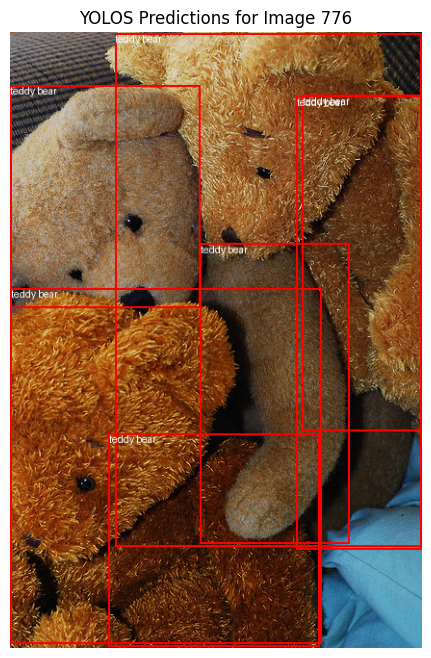

100%|██████████| 630/630 [02:29<00:00,  4.22it/s]


mAP@[0.5:0.95]: tensor(0.3880)
Detailed mAP results: {'map': tensor(0.3880), 'map_50': tensor(0.5635), 'map_75': tensor(0.4174), 'map_small': tensor(0.1303), 'map_medium': tensor(0.3436), 'map_large': tensor(0.5533), 'mar_1': tensor(0.3173), 'mar_10': tensor(0.4620), 'mar_100': tensor(0.4755), 'mar_small': tensor(0.1854), 'mar_medium': tensor(0.4410), 'mar_large': tensor(0.6353), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 9 - Validation mAP Score: 0.3880


map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.387976  0.563462  0.417392   0.130295    0.343616   0.553327  0.317259   

     mar_10  mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.462028  0.47546   0.185366    0.441023   0.635321           -1.0   

   mar_100_per_class  
0               -1.0

  0%|          | 1/368 [00:04<27:15,  4.46s/it]

Epoch 10, Batch 0: Loss = 1.0498


  3%|▎         | 11/368 [00:44<26:29,  4.45s/it]

Epoch 10, Batch 10: Loss = 1.2063


  6%|▌         | 21/368 [01:23<21:15,  3.68s/it]

Epoch 10, Batch 20: Loss = 1.1490


  8%|▊         | 31/368 [02:05<24:17,  4.32s/it]

Epoch 10, Batch 30: Loss = 0.8131


 11%|█         | 41/368 [02:46<21:43,  3.99s/it]

Epoch 10, Batch 40: Loss = 1.0907


 14%|█▍        | 51/368 [03:33<23:46,  4.50s/it]

Epoch 10, Batch 50: Loss = 0.9598


 17%|█▋        | 61/368 [04:12<17:52,  3.49s/it]

Epoch 10, Batch 60: Loss = 1.0105


 19%|█▉        | 71/368 [04:50<19:50,  4.01s/it]

Epoch 10, Batch 70: Loss = 0.9391


 22%|██▏       | 81/368 [05:22<15:54,  3.32s/it]

Epoch 10, Batch 80: Loss = 0.9940


 25%|██▍       | 91/368 [05:57<17:10,  3.72s/it]

Epoch 10, Batch 90: Loss = 0.8332


 27%|██▋       | 101/368 [06:35<15:47,  3.55s/it]

Epoch 10, Batch 100: Loss = 0.9472


 30%|███       | 111/368 [07:16<19:37,  4.58s/it]

Epoch 10, Batch 110: Loss = 0.9314


 33%|███▎      | 121/368 [07:56<15:44,  3.83s/it]

Epoch 10, Batch 120: Loss = 1.0644


 36%|███▌      | 131/368 [08:31<15:00,  3.80s/it]

Epoch 10, Batch 130: Loss = 0.8880


 38%|███▊      | 141/368 [09:09<15:14,  4.03s/it]

Epoch 10, Batch 140: Loss = 0.9725


 41%|████      | 151/368 [09:48<13:23,  3.70s/it]

Epoch 10, Batch 150: Loss = 1.1920


 44%|████▍     | 161/368 [10:35<16:57,  4.91s/it]

Epoch 10, Batch 160: Loss = 0.9891


 46%|████▋     | 171/368 [11:14<12:05,  3.68s/it]

Epoch 10, Batch 170: Loss = 0.8786


 49%|████▉     | 181/368 [11:51<12:54,  4.14s/it]

Epoch 10, Batch 180: Loss = 1.0335


 52%|█████▏    | 191/368 [12:34<13:14,  4.49s/it]

Epoch 10, Batch 190: Loss = 0.9126


 55%|█████▍    | 201/368 [13:22<14:10,  5.09s/it]

Epoch 10, Batch 200: Loss = 1.0723


 57%|█████▋    | 211/368 [13:59<10:57,  4.19s/it]

Epoch 10, Batch 210: Loss = 0.9215


 60%|██████    | 221/368 [14:40<10:01,  4.09s/it]

Epoch 10, Batch 220: Loss = 0.9229


 63%|██████▎   | 231/368 [15:16<07:46,  3.40s/it]

Epoch 10, Batch 230: Loss = 1.1319


 65%|██████▌   | 241/368 [16:00<10:16,  4.86s/it]

Epoch 10, Batch 240: Loss = 0.8339


 68%|██████▊   | 251/368 [16:45<08:58,  4.60s/it]

Epoch 10, Batch 250: Loss = 1.1023


 71%|███████   | 261/368 [17:26<07:25,  4.16s/it]

Epoch 10, Batch 260: Loss = 1.0710


 74%|███████▎  | 271/368 [18:12<07:10,  4.44s/it]

Epoch 10, Batch 270: Loss = 1.0234


 76%|███████▋  | 281/368 [18:51<04:56,  3.40s/it]

Epoch 10, Batch 280: Loss = 1.1101


 79%|███████▉  | 291/368 [19:35<06:13,  4.85s/it]

Epoch 10, Batch 290: Loss = 0.8977


 82%|████████▏ | 301/368 [20:22<06:03,  5.42s/it]

Epoch 10, Batch 300: Loss = 0.8231


 85%|████████▍ | 311/368 [21:01<04:22,  4.60s/it]

Epoch 10, Batch 310: Loss = 0.9744


 87%|████████▋ | 321/368 [21:43<03:27,  4.42s/it]

Epoch 10, Batch 320: Loss = 1.0984


 90%|████████▉ | 331/368 [22:21<02:14,  3.63s/it]

Epoch 10, Batch 330: Loss = 1.0645


 93%|█████████▎| 341/368 [23:01<02:06,  4.70s/it]

Epoch 10, Batch 340: Loss = 1.1590


 95%|█████████▌| 351/368 [23:36<00:53,  3.12s/it]

Epoch 10, Batch 350: Loss = 1.0353


 98%|█████████▊| 361/368 [24:17<00:30,  4.32s/it]

Epoch 10, Batch 360: Loss = 1.0933


100%|██████████| 368/368 [24:45<00:00,  4.04s/it]


Epoch 10 Complete. Average train Loss: 4.0268, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [03:00<00:00,  1.14s/it]


Epoch 10 - Validation Loss: 3.9476


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.944 at location [0.96, 265.96, 323.2, 635.05]
Detected teddy bear with confidence 0.583 at location [303.66, 66.0, 427.69, 414.52]
Detected teddy bear with confidence 0.914 at location [198.0, 219.79, 352.7, 531.27]
Detected teddy bear with confidence 0.68 at location [297.91, 67.09, 428.0, 537.67]
Detected teddy bear with confidence 0.966 at location [109.04, 1.43, 427.56, 534.61]
Detected teddy bear with confidence 0.985 at location [0.03, 55.11, 197.53, 286.85]
Detected teddy bear with confidence 0.616 at location [102.78, 416.94, 321.27, 638.71]


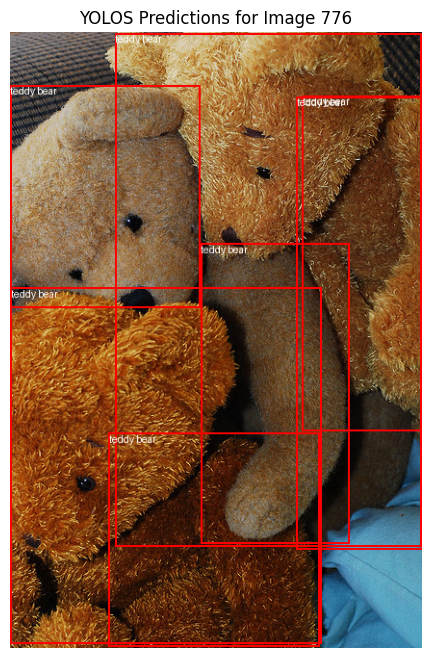

100%|██████████| 630/630 [02:29<00:00,  4.22it/s]


mAP@[0.5:0.95]: tensor(0.3890)
Detailed mAP results: {'map': tensor(0.3890), 'map_50': tensor(0.5650), 'map_75': tensor(0.4175), 'map_small': tensor(0.1305), 'map_medium': tensor(0.3430), 'map_large': tensor(0.5550), 'mar_1': tensor(0.3173), 'mar_10': tensor(0.4640), 'mar_100': tensor(0.4796), 'mar_small': tensor(0.1875), 'mar_medium': tensor(0.4442), 'mar_large': tensor(0.6400), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 10 - Validation mAP Score: 0.3890


map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.388951  0.564995  0.417486   0.130512     0.34297   0.555029  0.317347   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.464041  0.479571   0.187518    0.444157   0.640038           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3890 at epoch 10


In [ ]:
# Train Setting
epochs = 10
optimizer = torch.optim.AdamW(loha_parameters, lr=3e-5, weight_decay=0.01)
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=2, T_mult=2, eta_min=1e-6)
early_stopping = EarlyStopping(patience=3)

# Train the LoHa model
best_mAP_score_LoHa, epochs_list_LoHa, train_total_losses_LoHa, val_total_losses_LoHa, train_focal_losses_LoHa, train_bbox_losses_LoHa, train_giou_losses_LoHa, mAP_scores_LoHa = train_model(
    model_with_LoHa, processor, train_dataloader, val_dataloader, optimizer, scheduler, early_stopping, device, "loha_model.pth", epochs
)


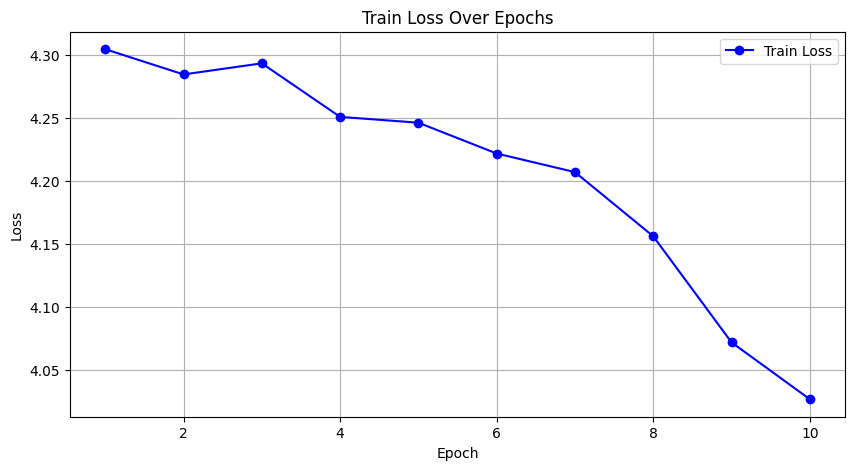

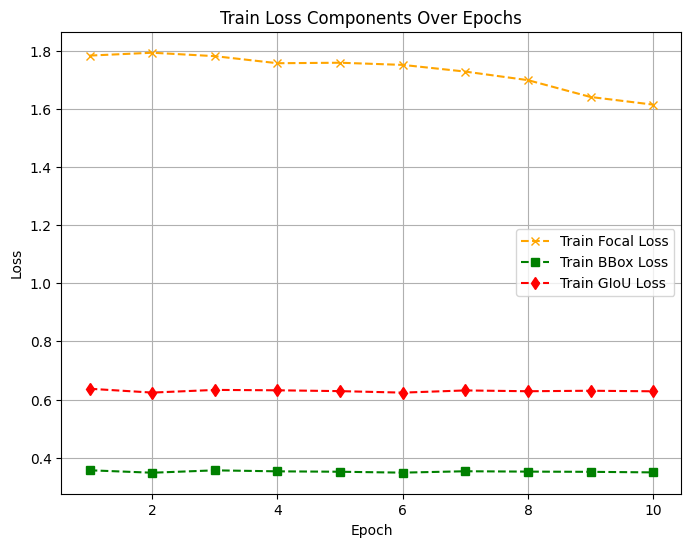

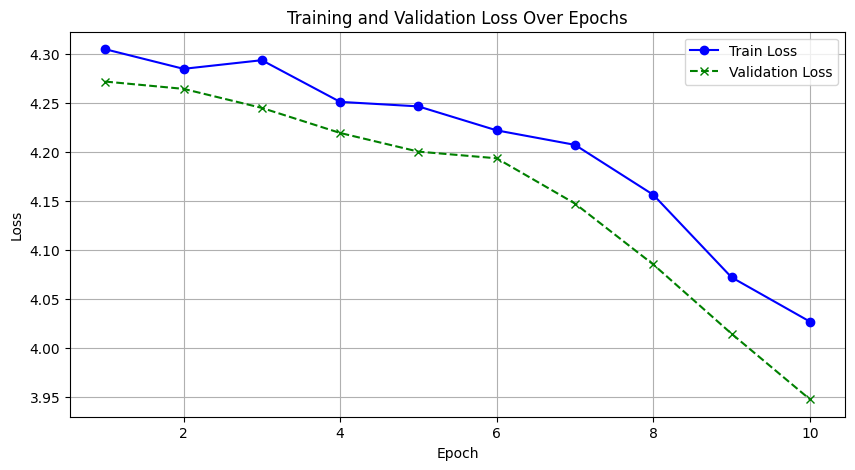

In [ ]:
plot_loss_graphs(epochs_list_LoHa, train_total_losses_LoHa, train_focal_losses_LoHa, train_bbox_losses_LoHa, train_giou_losses_LoHa, val_total_losses_LoHa)


In [ ]:
# Load the saved model
model_with_LoHa = torch.load("loha_model.pth", map_location=torch.device("cuda" if torch.cuda.is_available() else "cpu"))
print(model_with_LoHa.peft_config)

# Check which weights have been updated
for name, param in model_with_LoHa.named_parameters():
    if param.requires_grad:
        print(f"{name} Trainable (Updated)")
    else:
        print(f"{name} Frozen (Original)")

print(model_with_LoHa)

{'default': LoHaConfig(task_type=None, peft_type=<PeftType.LOHA: 'LOHA'>, auto_mapping=None, base_model_name_or_path='hustvl/yolos-small', revision=None, inference_mode=False, rank_pattern={}, alpha_pattern={}, r=8, alpha=12, rank_dropout=0.1, module_dropout=0.1, use_effective_conv2d=False, target_modules={'query', 'value'}, exclude_modules=None, init_weights=True, layers_to_transform=None, layers_pattern=None, modules_to_save=None)}
base_model.model.vit.embeddings.cls_token Frozen (Original)
base_model.model.vit.embeddings.detection_tokens Frozen (Original)
base_model.model.vit.embeddings.position_embeddings Frozen (Original)
base_model.model.vit.embeddings.patch_embeddings.projection.weight Frozen (Original)
base_model.model.vit.embeddings.patch_embeddings.projection.bias Frozen (Original)
base_model.model.vit.encoder.mid_position_embeddings Frozen (Original)
base_model.model.vit.encoder.layer.0.attention.attention.query.base_layer.weight Frozen (Original)
base_model.model.vit.encode

<ipython-input-63-d6d1e4258480>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_with_LoHa = torch.load("loha_model.pth", map_location=torch.device("cuda" if torch.cud

In [ ]:
# Mean value of LoHa layers after training
for name, param in model_with_LoHa.named_parameters():
    if "hada" in name:
        print(f"{name} mean after training: {param.data.mean().item():.6f}")

base_model.model.vit.encoder.layer.0.attention.attention.query.hada_w1_a.default mean after training: -0.002665
base_model.model.vit.encoder.layer.0.attention.attention.query.hada_w1_b.default mean after training: -0.000875
base_model.model.vit.encoder.layer.0.attention.attention.query.hada_w2_a.default mean after training: -0.002052
base_model.model.vit.encoder.layer.0.attention.attention.query.hada_w2_b.default mean after training: -0.000034
base_model.model.vit.encoder.layer.0.attention.attention.value.hada_w1_a.default mean after training: 0.005026
base_model.model.vit.encoder.layer.0.attention.attention.value.hada_w1_b.default mean after training: 0.000017
base_model.model.vit.encoder.layer.0.attention.attention.value.hada_w2_a.default mean after training: 0.005247
base_model.model.vit.encoder.layer.0.attention.attention.value.hada_w2_b.default mean after training: -0.000004
base_model.model.vit.encoder.layer.1.attention.attention.query.hada_w1_a.default mean after training: -0.00

#### **Evaluate Model with LoHa**

0it [00:00, ?it/s]

Detected sports ball with confidence 1.0 at location [49.69, 193.45, 188.75, 328.96]
Detected person with confidence 0.912 at location [140.43, 22.35, 461.92, 475.77]
Detected person with confidence 0.998 at location [425.45, 29.59, 618.64, 477.13]
Detected person with confidence 0.527 at location [101.84, 21.78, 459.51, 475.66]
Detected person with confidence 0.996 at location [16.53, 21.65, 460.98, 475.08]


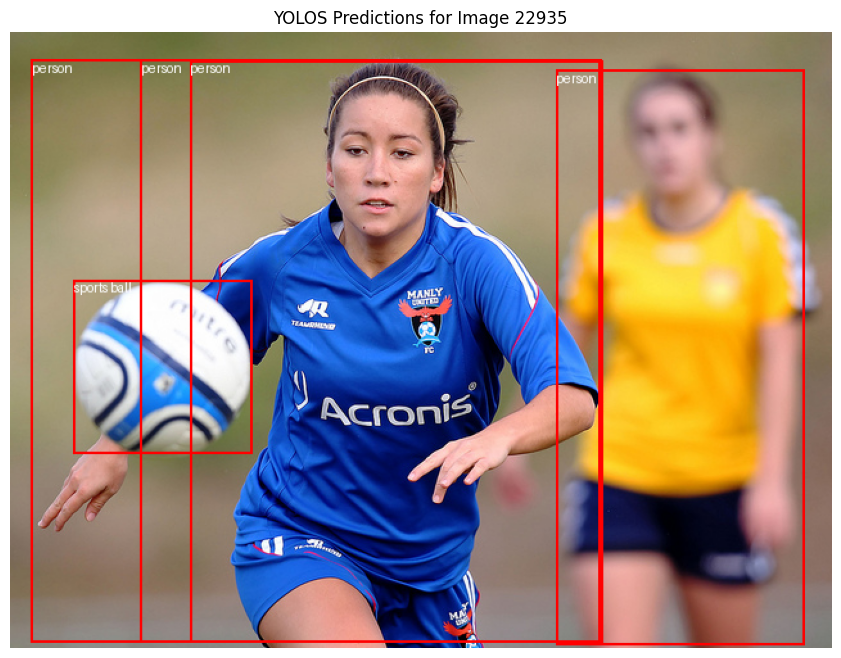

900it [03:42,  4.05it/s]


mAP@[0.5:0.95]: tensor(0.3327)
Detailed mAP results: {'map': tensor(0.3327), 'map_50': tensor(0.5165), 'map_75': tensor(0.3425), 'map_small': tensor(0.0922), 'map_medium': tensor(0.3183), 'map_large': tensor(0.5120), 'mar_1': tensor(0.2855), 'mar_10': tensor(0.4185), 'mar_100': tensor(0.4317), 'mar_small': tensor(0.1509), 'mar_medium': tensor(0.4106), 'mar_large': tensor(0.6046), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Model with LoHa Performance (mAP): {'map': tensor(0.3327), 'map_50': tensor(0.5165), 'map_75': tensor(0.3425), 'map_small': tensor(0.0922), 'map_medium': tensor(

map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.332727  0.516466  0.342496   0.092201    0.318329   0.512017  0.285521   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.418458  0.431665   0.150939    0.410583    0.60458           -1.0   

   mar_100_per_class  
0               -1.0

In [ ]:
model_with_LoHa_results = evaluate_model(model_with_LoHa, processor, test_dataset, yolos_categories)
print("Model with LoHa Performance (mAP):", model_with_LoHa_results)

model_with_LoHA_results_dict = {
    key: value.item() if isinstance(value, torch.Tensor) else value
    for key, value in model_with_LoHa_results.items()
    if key != "classes"
}
model_with_LoHa_results_df = pd.DataFrame([model_with_LoHA_results_dict])
print("Model with LoHa Performance (mAP):")
print(model_with_LoHa_results_df)
display(model_with_LoHa_results_df)